In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('conversion_data.csv')

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

### Data scaling and get dummy varibles

In [5]:
df_f=df.loc[:,['age','total_pages_visited']]
df_c=df.loc[:,['country','new_user','source']]

In [6]:
df_c.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [7]:
df_c.new_user.value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [8]:
df.source.value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [9]:
df_c=pd.get_dummies(df_c)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_f=pd.DataFrame(scaler.fit_transform(df_f))
df_f.columns=['age','total_pages_visited']

In [11]:
df_main=pd.concat([df_f,df_c],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X=df_main
y=df.converted
X_train,X_test,y_train,y_test=train_test_split(X,y)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf1=LogisticRegression()
param1={'C':np.logspace(-3,3,7)}
gs1=GridSearchCV(clf1,param1)
gs1.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
gs1.score(X_test,y_test)

0.98561669829222009

In [15]:
gs1.best_estimator_.coef_

array([[-0.62149226,  2.53614028, -1.74650064, -3.62668845,  0.13631195,
        -0.09428427, -0.40789754, -1.24966397, -1.45268345, -1.29021089]])

In [16]:
X_test.columns

Index(['age', 'total_pages_visited', 'new_user', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo'],
      dtype='object')

### SVM

In [ ]:
from sklearn.svm import SVC
clf2=SVC()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)
# SVM takes too long to finish

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
clf3=GaussianNB()
clf3.fit(X_train,y_train)
clf3.score(X_test,y_test)

0.96352941176470586

### QDA

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf4=QuadraticDiscriminantAnalysis()
clf4.fit(X_train,y_train)
clf4.score(X_test,y_test)

/home/luo/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.96223908918406076

### LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf5=LinearDiscriminantAnalysis()
clf5.fit(X_train,y_train)
clf5.score(X_test,y_test)

/home/luo/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.98332700822264385

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf6=RandomForestClassifier(n_estimators=1000)
clf6.fit(X_train,y_train)
clf6.score(X_test,y_test)

0.9840101201771031

In [22]:
clf6.feature_importances_

array([ 0.11173649,  0.8084479 ,  0.0391247 ,  0.02229569,  0.00275255,
        0.00375136,  0.00387875,  0.00268555,  0.00258435,  0.00274266])

In [23]:
df_main.columns

Index(['age', 'total_pages_visited', 'new_user', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo'],
      dtype='object')

### Single Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf7=DecisionTreeClassifier()
clf7.fit(X_train,y_train)
clf7.score(X_test,y_test)

0.9836938646426312

In [27]:
clf7.feature_importances_

array([ 0.07250509,  0.79200544,  0.05454303,  0.03863534,  0.0048713 ,
        0.00658002,  0.00804602,  0.00786852,  0.00666196,  0.00828328])

In [48]:
from sklearn.tree import export_graphviz
import graphviz

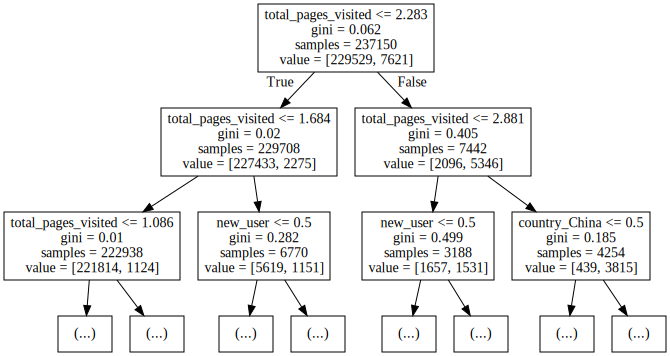

In [51]:
dot_data = export_graphviz(clf7, out_file=None, max_depth=2, feature_names=X_test.columns)
graph = graphviz.Source(dot_data)
graph